In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from datetime import datetime
from keras.utils import np_utils
from keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Draw grid on plot

Using TensorFlow backend.


In [ ]:
"""
 That class, Timer checks elasped time for training
"""
class Timer:

  def __init__(self):
    self.start = None
    self.end = None

  def start_timer(self):
    self.start = datetime.now()

  def stop_timer(self):
    self.end = datetime.now()
    return self.end - self.start

In [ ]:
def display_history(history):
  h = history.history
  fig, ax = plt.subplots(1,2, figsize = (8,4))
  plt.subplots_adjust(wspace = 0.5)
  fig.suptitle('Training result')

  ax[0].set_title('Accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].plot(h['acc'])
  ax[0].plot(h['val_acc'])
  
  ax[1].set_title('Loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].plot(h['loss'])
  ax[1].plot(h['val_loss'])
  fig.legend(['train','validation'])

In [ ]:
def create_LeNet():
  model = Sequential()
  """
  At 1st convolution stage, 20 filters with 5x5 are generated.
  As zero padding is used, size of output is same with input
  After the convolution, the maximum value in 2x2 area which is moved 2 steps vertically and horizontally, is the output      
  """
  model.add(Conv2D(20, kernel_size=(5, 5), padding='same',
                  activation='relu', input_shape=INPUT_SHAPE))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

  """
  At 2nd convolution stage, two different things from the previous stage are # of filters and channels 
  """
  model.add(Conv2D(50, kernel_size=(5, 5), 
                 activation='relu', padding = 'same'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

  """
  Convert the matrix to the vector for classfication
  """
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(CLASSES, activation='softmax'))

  return model

from keras.layers.core import Dropout

def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu', kernel_initializer = initializer))
  model.add(Dropout(0.3))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

# 1. LeNet

In [ ]:
CLASSES = 10 # Number of labels
HIDDENS = 128 # How many neurons(nodes) in hidden layers
EPOCHS = 20 # train dataset is used "EPOCHS" times
BATCH_SIZE = 128 # How many data in the train dataset are used for update of weights one time
VERBOSE = 2 # How expression for training is printed
VALIDATION_SPLIT = 0.2 # How many data in train dataset are used for validation dataset which is not used for training

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The order depends on the backend of Keras
if K.image_data_format() == 'channels_first':
    _X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    _X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    INPUT_SHAPE = (1, img_rows, img_cols)

else: # In case of tensorflow, the order of dimension is (mini batch, row, column, channel) 
    _X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    _X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    INPUT_SHAPE = (img_rows, img_cols, 1)

# Data preprocessing
_X_train = _X_train.astype('float32')
_X_test = _X_test.astype('float32')
_X_train /= 255
_X_test /= 255

# OHE
Y_train = keras.utils.to_categorical(y_train, CLASSES)
Y_test = keras.utils.to_categorical(y_test, CLASSES)

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
print('Preprocessed X_train shape:', _X_train.shape)
print(_X_train.shape[0], 'train samples')
print(_X_test.shape[0], 'test samples')

Preprocessed X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
K.clear_session()
model = create_LeNet()
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)         

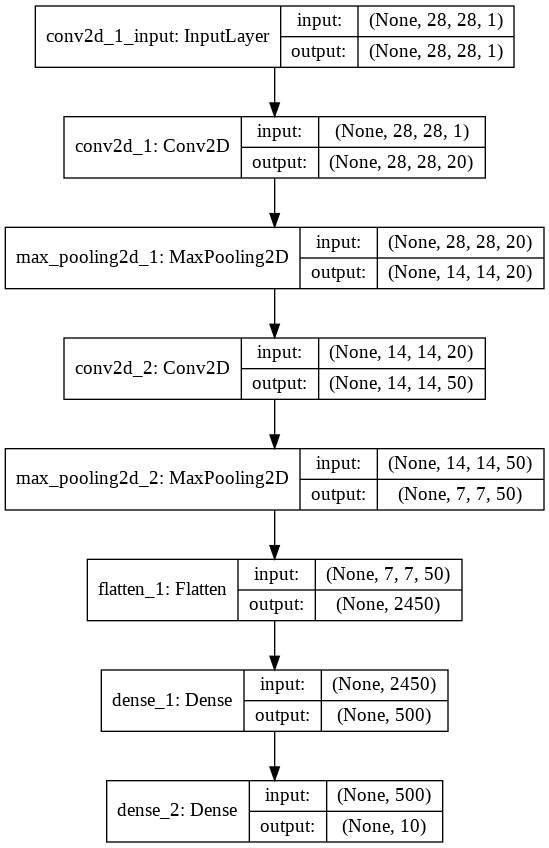

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(_X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





 - 17s - loss: 0.1797 - acc: 0.9455 - val_loss: 0.0601 - val_acc: 0.9803
Epoch 2/20
 - 3s - loss: 0.0492 - acc: 0.9857 - val_loss: 0.0419 - val_acc: 0.9872
Epoch 3/20
 - 3s - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 4/20
 - 3s - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0377 - val_acc: 0.9883
Epoch 5/20
 - 3s - loss: 0.0181 - acc: 0.9940 - val_loss: 0.0410 - val_acc: 0.9881
Epoch 6/20
 - 3s - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0361 - val_acc: 0.9901
Epoch 7/20
 - 3s - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0360 - val_acc: 0.9907
Epoch 8/20
 - 3s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0393 - val_acc: 0.9891
Epoch 9/20
 - 3s - loss: 0.0084 - acc: 0.9971 - val_loss: 0.0344 - val_acc: 0.9905
Epoch 10/20
 - 3s - loss: 0.0073 - acc: 0.9975 - val_loss: 0.0565 - val_acc: 0.9862
Epoch 11/20
 -

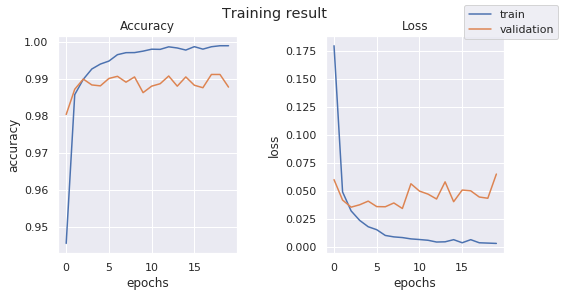

In [ ]:
display_history(history)

In [ ]:
_, acc = model.evaluate(_X_test, Y_test, verbose = 0)
print('Accuarcy :',acc)

Accuarcy : 0.9908


# 2. ANN vs CNN
Compare CNN with ANN, using MNIST dataset.
Small # of train dataset to update weights is used for both ANN & CNN.
Remainders are used for validation set

In [ ]:
accs_ann = []
accs_cnn = []
histories = []
samples_tr = _X_train.copy()
samples_te = _X_test.copy()

In [ ]:
def get_train_set(size):
  _samples_tr = samples_tr[:size]
  _Y_train = Y_train[:size]
  _samples_va = samples_tr[size:]
  _Y_val = Y_train[size:]
  return _samples_tr, _Y_train, _samples_va, _Y_val 

def train_ann():  
  ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

  timer = Timer()
  timer.start_timer()
  history = ann.fit(_samples_tr.reshape(_samples_tr.shape[0],784), _Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                      verbose = 0, validation_data = (_samples_va.reshape(_samples_va.shape[0],784), _Y_val ))
  elasped = timer.stop_timer()
  print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))
  histories.append(history)
  
  

def train_cnn(): 
  history = cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

  timer = Timer()
  timer.start_timer()
  history = cnn.fit(_samples_tr, _Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                      verbose = 0, validation_data = (_samples_va, _Y_val ))
  elasped = timer.stop_timer()
  print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))
  histories.append(history)

def display_ann_cnn_train_result():

  fig, ax = plt.subplots(1,2, figsize = (8,4))
  plt.subplots_adjust(wspace = 0.5)
  fig.suptitle('Training result')
  ann_h = histories[0].history
  cnn_h = histories[1].history

  ax[0].set_title('Accuracy on validation')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy on validation')
  ax[0].plot(ann_h['val_acc'])
  ax[0].plot(cnn_h['val_acc'])
  
  ax[1].set_title('Loss on validation')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].plot(ann_h['val_loss'])
  ax[1].plot(cnn_h['val_loss'])
  fig.legend(['ANN','CNN'])
 

In [ ]:
K.clear_session()
ann = create_mlp(4,'glorot_normal')
cnn = create_LeNet()
_samples_tr, _Y_train, _samples_va, _Y_val = get_train_set(5900)
train_ann()
train_cnn()

_, acc_ann = ann.evaluate(samples_te.reshape(10000,784), Y_test)
print("ANN accuracy on test :", acc_ann)

_, acc_cnn = cnn.evaluate(samples_te, Y_test)
print("CNN accuracy on test :", acc_cnn)

accs_ann.append(acc_ann)
accs_cnn.append(acc_cnn)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Elasped time(HH:MM:SS.ms) - 0:00:18.017183
Elasped time(HH:MM:SS.ms) - 0:00:31.775480
10000/10000 [==============================] - 0s 38us/step
ANN accuracy on test : 0.9431
10000/10000 [==============================] - 1s 55us/step
CNN accuracy on test : 0.9812


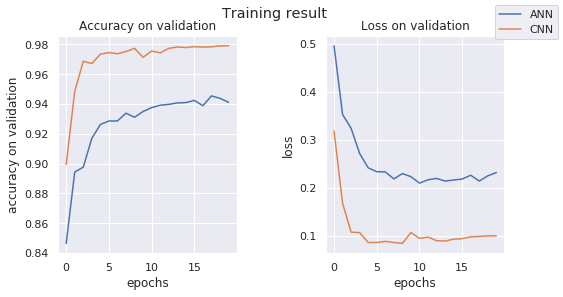

In [ ]:
display_ann_cnn_train_result()

In [ ]:
K.clear_session()
histories = []
ann = create_mlp(4,'glorot_normal')
cnn = create_LeNet()
_samples_tr, _Y_train, _samples_va, _Y_val = get_train_set(3000)
train_ann()
train_cnn()

_, acc_ann = ann.evaluate(samples_te.reshape(10000,784), Y_test)
print("ANN accuracy on test :", acc_ann)

_, acc_cnn = cnn.evaluate(samples_te, Y_test)
print("CNN accuracy on test :", acc_cnn)

accs_ann.append(acc_ann)
accs_cnn.append(acc_cnn)

Elasped time(HH:MM:SS.ms) - 0:00:16.400201
Elasped time(HH:MM:SS.ms) - 0:00:29.358553
10000/10000 [==============================] - 0s 48us/step
ANN accuracy on test : 0.9318
10000/10000 [==============================] - 1s 56us/step
CNN accuracy on test : 0.9752


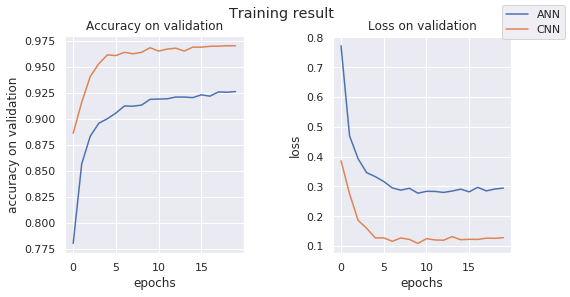

In [ ]:
display_ann_cnn_train_result()

In [ ]:
K.clear_session()
histories = []
ann = create_mlp(4,'glorot_normal')
cnn = create_LeNet()
_samples_tr, _Y_train, _samples_va, _Y_val = get_train_set(1800)
train_ann()
train_cnn()

_, acc_ann = ann.evaluate(samples_te.reshape(10000,784), Y_test)
print("ANN accuracy on test :", acc_ann)

_, acc_cnn = cnn.evaluate(samples_te, Y_test)
print("CNN accuracy on test :", acc_cnn)

accs_ann.append(acc_ann)
accs_cnn.append(acc_cnn)

Elasped time(HH:MM:SS.ms) - 0:00:16.870098
Elasped time(HH:MM:SS.ms) - 0:00:28.467414
10000/10000 [==============================] - 0s 36us/step
ANN accuracy on test : 0.9108
10000/10000 [==============================] - 1s 54us/step
CNN accuracy on test : 0.9628


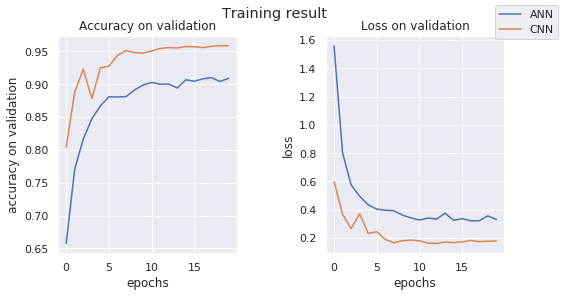

In [ ]:
display_ann_cnn_train_result()

In [ ]:
K.clear_session()
histories = []
ann = create_mlp(4,'glorot_normal')
cnn = create_LeNet()
_samples_tr, _Y_train, _samples_va, _Y_val = get_train_set(600)
train_ann()
train_cnn()

_, acc_ann = ann.evaluate(samples_te.reshape(10000,784), Y_test)
print("ANN, accuracy on test :", acc_ann)

_, acc_cnn = cnn.evaluate(samples_te, Y_test)
print("CNN accuracy on test :", acc_cnn)

accs_ann.append(acc_ann)
accs_cnn.append(acc_cnn)

Elasped time(HH:MM:SS.ms) - 0:00:15.946353
Elasped time(HH:MM:SS.ms) - 0:00:27.840439
10000/10000 [==============================] - 0s 41us/step
ANN, accuracy on test : 0.8611
10000/10000 [==============================] - 1s 55us/step
CNN accuracy on test : 0.9198


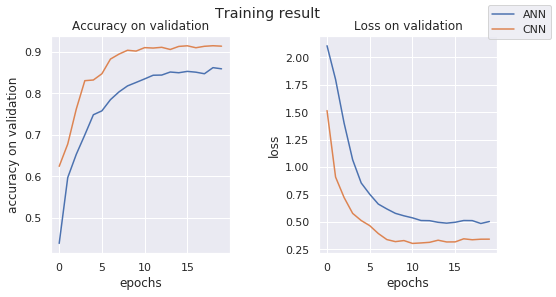

In [ ]:
display_ann_cnn_train_result()

In [ ]:
K.clear_session()
histories = []
ann = create_mlp(4,'glorot_normal')
cnn = create_LeNet()
_samples_tr, _Y_train, _samples_va, _Y_val = get_train_set(300)
train_ann()
train_cnn()

_, acc_ann = ann.evaluate(samples_te.reshape(10000,784), Y_test)
print("ANN accuracy on test :", acc_ann)

_, acc_cnn = cnn.evaluate(samples_te, Y_test)
print("CNNaccuracy on test :", acc_cnn)

accs_ann.append(acc_ann)
accs_cnn.append(acc_cnn)

Elasped time(HH:MM:SS.ms) - 0:00:15.746075
Elasped time(HH:MM:SS.ms) - 0:00:27.502478
10000/10000 [==============================] - 0s 38us/step
ANN accuracy on test : 0.7824
10000/10000 [==============================] - 1s 54us/step
CNNaccuracy on test : 0.8574


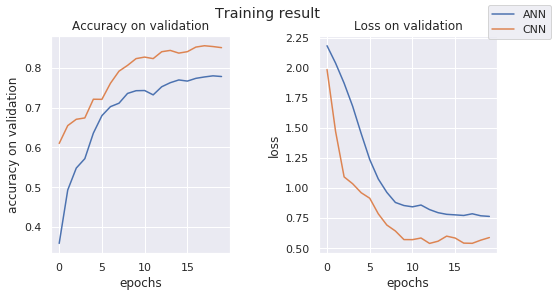

In [ ]:
display_ann_cnn_train_result()

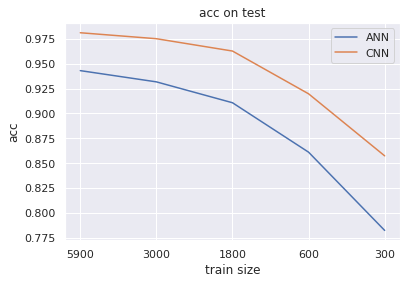

In [ ]:
plt.plot(['5900','3000','1800','600','300'],accs_ann)
plt.plot(accs_cnn)
plt.title('acc on test')
plt.legend(['ANN','CNN'])
plt.xlabel('train size')
plt.ylabel('acc')
plt.show()

# Cifar-10

In [ ]:
from keras.datasets import cifar10
from sklearn import metrics
import itertools
import pandas as pd

CLASSES = 10
LABELS = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
INPUT_SHAPE = (32,32,3)

def display_dataset(X_train, y_train, title):  
  fig, ax = plt.subplots(2, 5, figsize = (10, 10))
  fig.suptitle(title)
  fig.subplots_adjust(bottom = 0.45)
  label = 0
  for y, x in [(j, i) for j in range(2) for i in range(5)]:
    _y_train = y_train[y_train == label]
    _X_train = X_train[y_train == label]
    idx = np.random.randint(len(_y_train))
    ax[y, x].imshow(_X_train[idx])
    ax[y, x].set_title(LABELS[label])
    ax[y, x].axis('off')
    label += 1

def visualize_prediction(X_test,y_test,preds):
  fig, ax = plt.subplots(4, 4, figsize = (10, 10))
  plt.subplots_adjust(hspace = 0.8)
  fig.suptitle('Test')

  for y, x in [(j, i) for j in range(4) for i in range(4)]:
    if y == 2 and x == 0 : # display false prediction
      _X_test = X_test[y_test != preds.argmax(axis = 1)]
      _preds = preds[y_test != preds.argmax(axis = 1)]
      _y_test = y_test[y_test != preds.argmax(axis = 1)]

    elif y == 0 and x == 0 : # display true prediction
      _X_test = X_test[y_test == preds.argmax(axis = 1)]
      _preds = preds[y_test == preds.argmax(axis = 1)]
      _y_test = y_test[y_test == preds.argmax(axis = 1)]
      
      
    idx = np.random.randint(len(_y_test))
    ax[y, x].set_title("true : "+str(LABELS[_y_test[idx]])+"\n pred : " + str(LABELS[_preds[idx].argmax()])+"\n"+str(round(_preds[idx].max(),2)))
    ax[y, x].axis('off')
    ax[y, x].imshow(_X_test[idx])



# reference : https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN
def get_confustion_matrix(Y_test, preds):
    Y_true = pd.Series([LABELS[i] for i in np.argmax(Y_test, axis=1)])
    Y_pred = pd.Series([LABELS[i] for i in np.argmax(preds, axis=1)])

    return metrics.confusion_matrix(Y_true, Y_pred)  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(LABELS))
    plt.xticks(tick_marks, LABELS, rotation=90, fontsize = 20)
    plt.yticks(tick_marks, LABELS, fontsize = 20)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label', fontsize = 15)

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


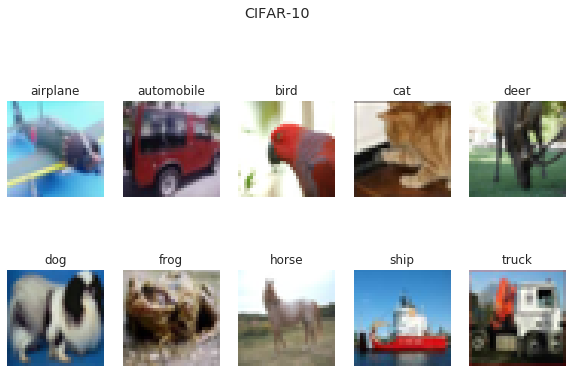

In [ ]:
display_dataset(X_train, y_train.reshape(50000),'CIFAR-10')

In [ ]:
_X_train = X_train.astype('float32')/255
_X_test = X_test.astype('float32')/255
Y_train = np_utils.to_categorical(y_train, CLASSES)
Y_test = np_utils.to_categorical(y_test, CLASSES)

In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', 
                 input_shape = INPUT_SHAPE, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

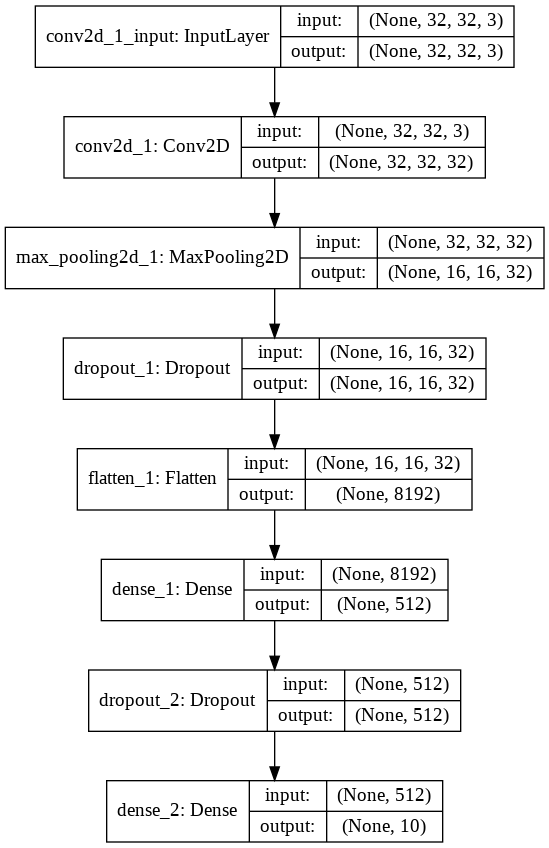

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
EPOCHS = 50
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(_X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 1.7621 - acc: 0.3662 - val_loss: 1.4086 - val_acc: 0.5145
Epoch 2/50
 - 4s - loss: 1.4038 - acc: 0.4959 - val_loss: 1.2855 - val_acc: 0.5506
Epoch 3/50
 - 4s - loss: 1.2893 - acc: 0.5405 - val_loss: 1.1956 - val_acc: 0.5840
Epoch 4/50
 - 4s - loss: 1.2166 - acc: 0.5657 - val_loss: 1.1458 - val_acc: 0.5989
Epoch 5/50
 - 4s - loss: 1.1538 - acc: 0.5889 - val_loss: 1.0976 - val_acc: 0.6171
Epoch 6/50
 - 4s - loss: 1.1126 - acc: 0.6041 - val_loss: 1.0767 - val_acc: 0.6222
Epoch 7/50
 - 4s - loss: 1.0615 - acc: 0.6235 - val_loss: 1.0453 - val_acc: 0.6375
Epoch 8/50
 - 4s - loss: 1.0303 - acc: 0.6330 - val_loss: 1.0208 - val_acc: 0.6445
Epoch 9/50
 - 4s - loss: 0.9943 - acc: 0.6472 - val_loss: 1.0242 - val_acc: 0.6405
Epoch 10/50
 - 4s - loss: 0.9576 - acc: 0.6598 - val_loss: 0.9910 - val_acc: 0.6557
Epoch 11/50
 - 5s - loss: 0.9386 - acc: 0.6651 - val_loss: 1.0163 - val_acc: 0.6417
Epoch 12/50
 - 4s - loss: 0.9064 - 

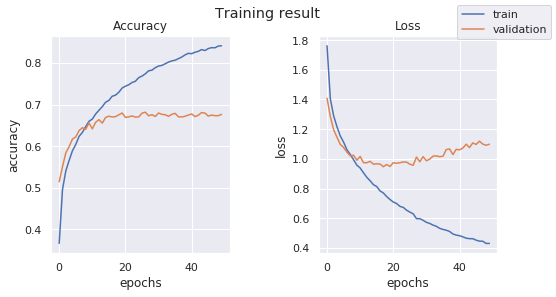

In [ ]:
display_history(history)

In [ ]:
_, acc = model.evaluate(_X_test, Y_test, verbose = 0)
print('Accuarcy :',acc)

Accuarcy : 0.6732


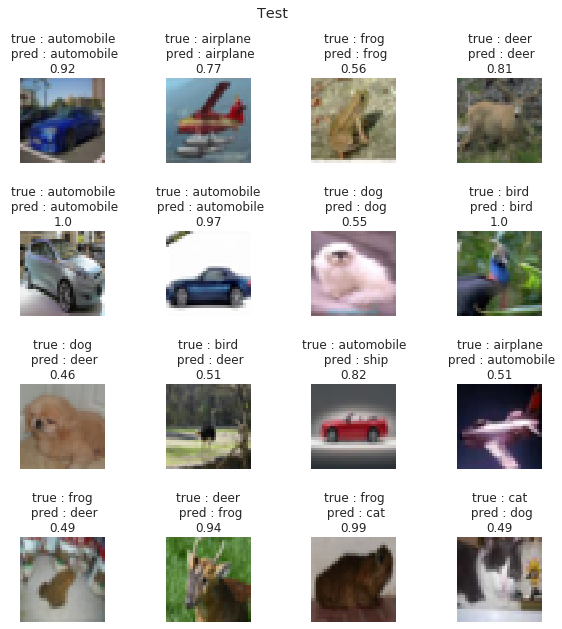

In [ ]:
preds = model.predict(_X_test)
visualize_prediction(X_test,y_test.reshape(10000),preds)

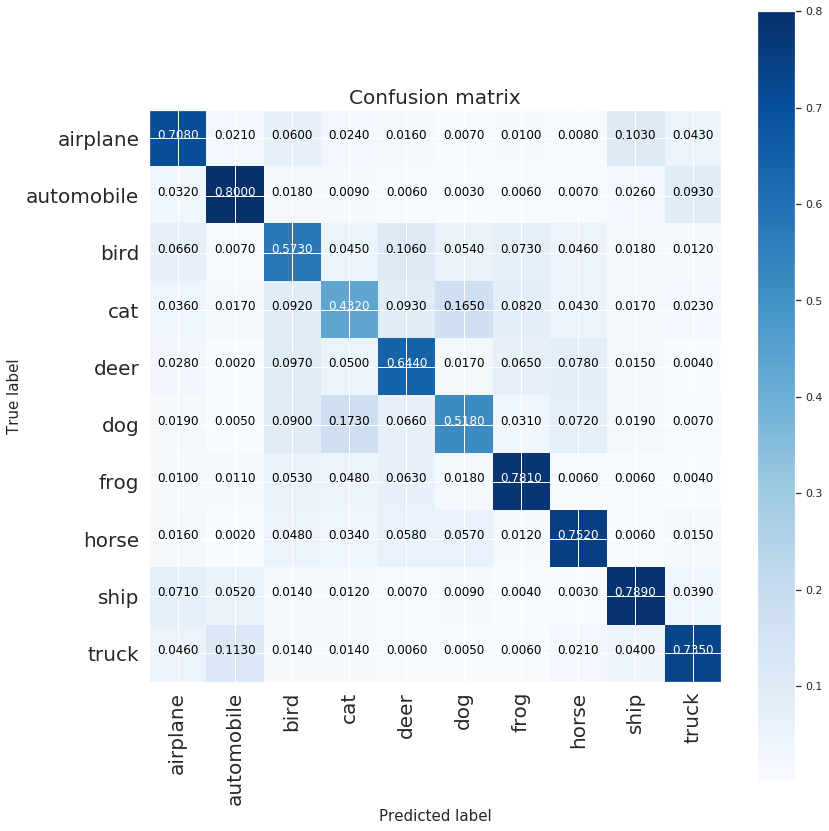

In [ ]:
cm = get_confustion_matrix(Y_test, preds)
plot_confusion_matrix(cm, LABELS, True)

In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid',
input_shape= INPUT_SHAPE, activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='valid', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

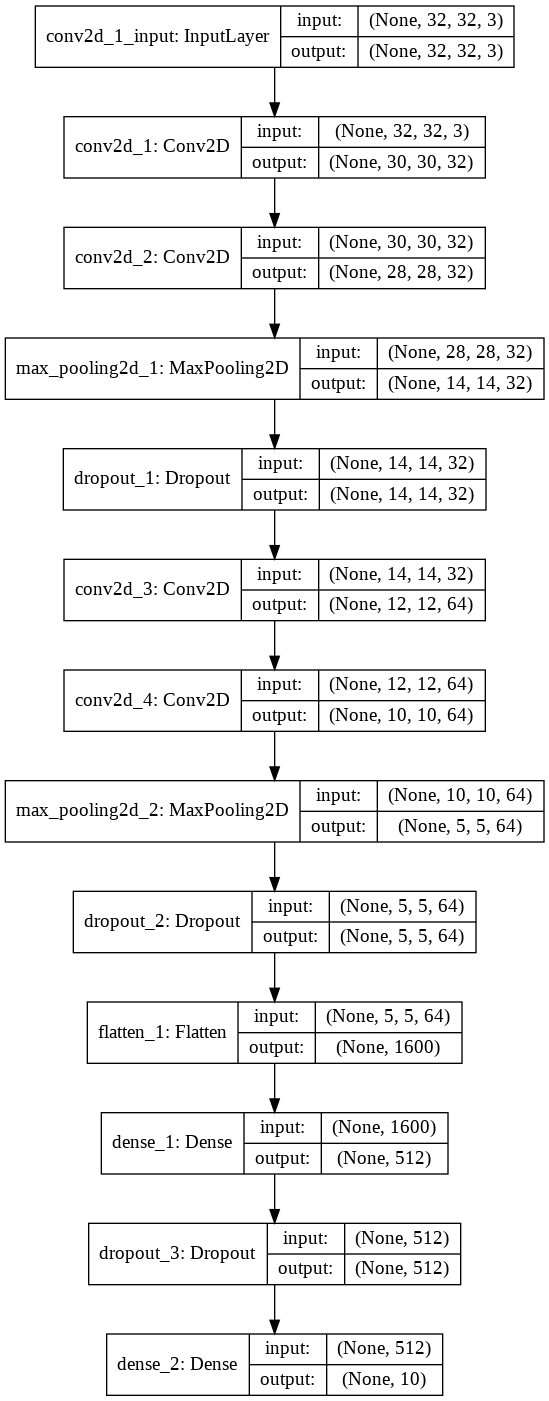

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(_X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 6s - loss: 1.7220 - acc: 0.3665 - val_loss: 1.3777 - val_acc: 0.5000
Epoch 2/50
 - 5s - loss: 1.3262 - acc: 0.5237 - val_loss: 1.1308 - val_acc: 0.6024
Epoch 3/50
 - 5s - loss: 1.1621 - acc: 0.5863 - val_loss: 1.0604 - val_acc: 0.6323
Epoch 4/50
 - 5s - loss: 1.0573 - acc: 0.6257 - val_loss: 0.9248 - val_acc: 0.6765
Epoch 5/50
 - 5s - loss: 0.9644 - acc: 0.6587 - val_loss: 0.8699 - val_acc: 0.6869
Epoch 6/50
 - 5s - loss: 0.8914 - acc: 0.6864 - val_loss: 0.8292 - val_acc: 0.7062
Epoch 7/50
 - 5s - loss: 0.8453 - acc: 0.7011 - val_loss: 0.7733 - val_acc: 0.7279
Epoch 8/50
 - 5s - loss: 0.8043 - acc: 0.7148 - val_loss: 0.7809 - val_acc: 0.7225
Epoch 9/50
 - 5s - loss: 0.7694 - acc: 0.7257 - val_loss: 0.7155 - val_acc: 0.7489
Epoch 10/50
 - 5s - loss: 0.7330 - acc: 0.7415 - val_loss: 0.7169 - val_acc: 0.7499
Epoch 11/50
 - 5s - loss: 0.7035 - acc: 0.7511 - val_loss: 0.7082 - val_acc: 0.7545
Epoch 12/50
 - 5s - loss: 0.6923 - 

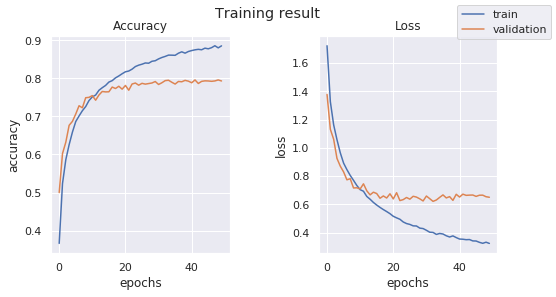

In [ ]:
display_history(history = history)

In [ ]:
_, acc = model.evaluate(_X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.7854


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

shape of x : (1, 32, 32, 3)


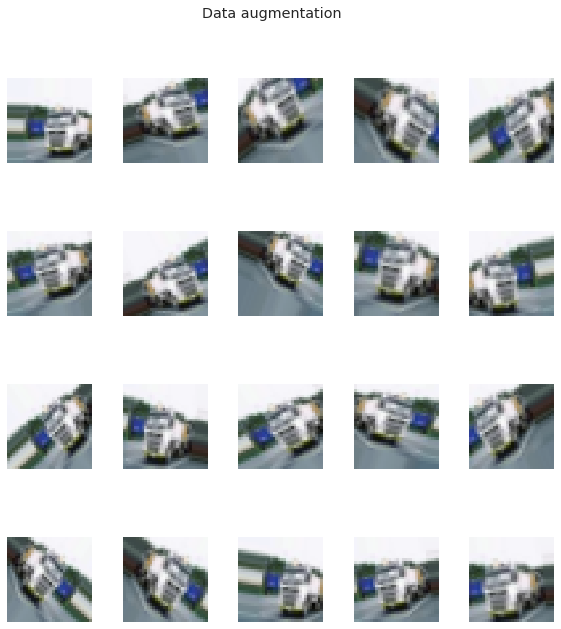

In [ ]:
X = X_train[1000]
X = X.reshape((1,) + X.shape)
print('shape of x :', X.shape)

i = 0
img_list = []
for aug_data in datagen.flow(X, batch_size=1):
  img_list.append(aug_data)
  i += 1
  if i > 20:
      break

fig, ax = plt.subplots(4, 5, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('Data augmentation')
cnt = 0
for y, x in [(j, i) for j in range(4) for i in range(5)]:            
  ax[y, x].axis('off')
  ax[y, x].imshow((img_list[cnt][0].astype(np.uint8)))
  cnt += 1

In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid',
input_shape= INPUT_SHAPE, activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='valid', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
datagen.fit(_X_train)
timer = Timer()
timer.start_timer()
history = model.fit_generator(datagen.flow(_X_train, Y_train, 
                                           batch_size=BATCH_SIZE), samples_per_epoch = _X_train.shape[0],
                              epochs = EPOCHS, verbose = VERBOSE)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, verbose=2, steps_per_epoch=390)`
  import sys


Epoch 1/50
 - 21s - loss: 1.9062 - acc: 0.2888
Epoch 2/50
 - 21s - loss: 1.6560 - acc: 0.3925
Epoch 3/50
 - 21s - loss: 1.5494 - acc: 0.4369
Epoch 4/50
 - 21s - loss: 1.4652 - acc: 0.4692
Epoch 5/50
 - 21s - loss: 1.4079 - acc: 0.4919
Epoch 6/50
 - 21s - loss: 1.3766 - acc: 0.5043
Epoch 7/50
 - 21s - loss: 1.3311 - acc: 0.5219
Epoch 8/50
 - 21s - loss: 1.3121 - acc: 0.5314
Epoch 9/50
 - 21s - loss: 1.2807 - acc: 0.5409
Epoch 10/50
 - 21s - loss: 1.2684 - acc: 0.5485
Epoch 11/50
 - 21s - loss: 1.2383 - acc: 0.5561
Epoch 12/50
 - 21s - loss: 1.2240 - acc: 0.5628
Epoch 13/50
 - 21s - loss: 1.2145 - acc: 0.5682
Epoch 14/50
 - 21s - loss: 1.1952 - acc: 0.5755
Epoch 15/50
 - 21s - loss: 1.1804 - acc: 0.5803
Epoch 16/50
 - 21s - loss: 1.1704 - acc: 0.5861
Epoch 17/50
 - 21s - loss: 1.1628 - acc: 0.5887
Epoch 18/50
 - 21s - loss: 1.1563 - acc: 0.5897
Epoch 19/50
 - 21s - loss: 1.1355 - acc: 0.6004
Epoch 20/50
 - 21s - loss: 1.1308 - acc: 0.6022
Epoch 21/50
 - 21s - loss: 1.1283 - acc: 0.6039
E

In [ ]:
_, acc = model.evaluate(_X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.7166


# Extracting features with VGG-16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
import requests
import cv2
import urllib

(-0.5, 499.5, 359.5, -0.5)

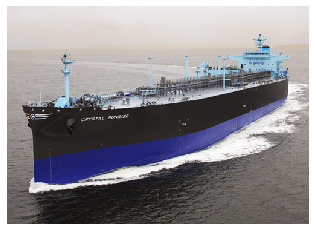

In [ ]:
# Reference : https://colab.research.google.com/drive/1Mv7fZIRE4nByNQyE0X-jhK8NIrSWgrU3#scrollTo=bw_2KLMHSOED
req = urllib.request.urlopen('https://www.jsea.or.jp/wp/wp-content/themes/nihon_senpaku/img/top/img02.jpg')
img = np.asarray(bytearray(req.read()),dtype = np.uint8)
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
plt.imshow(img)
plt.axis('off')

In [ ]:
K.clear_session()
base_model = VGG16(weights = 'imagenet', include_top = True)

553467904/553467096 [==============================] - 41s 0us/step


In [ ]:
for i,layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [ ]:
model = Model(input = base_model.input, output = base_model.get_layer('block1_pool').output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


In [ ]:
img = cv2.resize(img, (224,224))
img = np.expand_dims(img, axis = 0)
img = preprocess_input(img)

Shape of features : (1, 112, 112, 64)


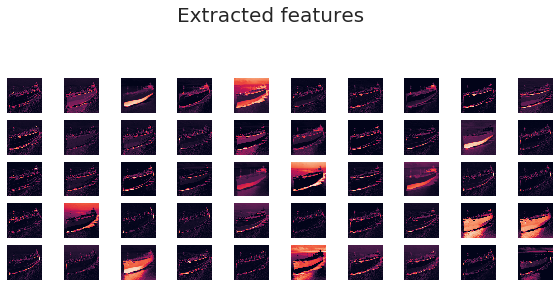

In [ ]:
features = model.predict(img)
print('Shape of features :',features.shape)
X = features[0]

fig, ax = plt.subplots(5, 10, figsize = (10, 10))
fig.suptitle('Extracted features',fontsize = 20)
fig.subplots_adjust(bottom = 0.6)
cnt = 0
for y, x in [(j, i) for j in range(5) for i in range(10)]:            
  ax[y, x].axis('off')
  ax[y, x].imshow(X[:,:,cnt])
  cnt += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


Shape of features : (1, 7, 7, 512)


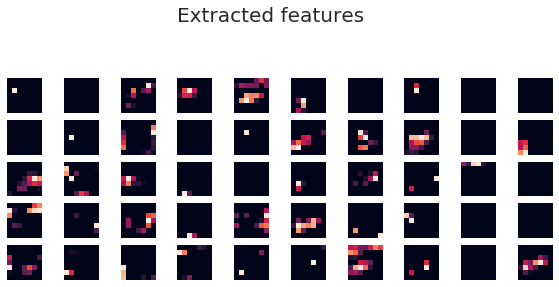

In [ ]:
model = Model(input = base_model.input, output = base_model.get_layer('block5_pool').output)
features = model.predict(img)
print('Shape of features :',features.shape)
X = features[0]

fig, ax = plt.subplots(5, 10, figsize = (10, 10))
fig.suptitle('Extracted features',fontsize = 20)
fig.subplots_adjust(bottom = 0.6)
cnt = 0
for y, x in [(j, i) for j in range(5) for i in range(10)]:            
  ax[y, x].axis('off')
  ax[y, x].imshow(X[:,:,cnt])
  cnt += 1